In [1]:
import pandas as pd

# Load the provided Excel file to examine its contents
file_path = 'DATA dSAT2.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Display the first few rows of the dataset to understand its structure
df_tidy.head()


,Column1,Phenotype,Animal_No,Stimulus_Duration,Distractor_Condition,HITS,MISSES,FA,CR,OM
0,51,ST,377.0,25,SAT,1.000000,5.333333,0.916667,19.083333,0.166667
1,99,ST,377.0,25,dSAT,1.625000,5.375000,NaN,NaN,0.000000
2,147,ST,377.0,50,SAT,2.166667,4.583333,NaN,NaN,0.000000
3,219,ST,377.0,50,dSAT,1.500000,5.875000,3.750000,16.500000,0.000000
4,294,ST,377.0,500,SAT,3.944444,2.333333,NaN,NaN,0.166667


In [2]:
import pandas as pd

# Load the dataset from the 'Tidy' sheet
file_path = 'DATA dSAT2.xlsx'
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Select relevant columns and drop missing values for the 'MISSES' dependent variable
df_MISSES = df_tidy[['Phenotype', 'Animal No', 'Stimulus Duration', 'Distractor Condition', 'MISSES']].dropna()

# Convert categorical variables to ensure they are treated as factors
df_MISSES['Stimulus Duration'] = df_MISSES['Stimulus Duration'].astype('category')
df_MISSES['Distractor Condition'] = df_MISSES['Distractor Condition'].astype('category')

# Aggregate the data by averaging MISSES for each combination of subject and experimental conditions
df_aggregated = df_MISSES.groupby(['Animal No', 'Phenotype', 'Stimulus Duration', 'Distractor Condition']).agg({'MISSES': 'mean'}).reset_index()

# Clean column names to remove spaces and special characters for analysis
df_aggregated_clean = df_aggregated.rename(columns={
    'Animal No': 'Animal_No',
    'Distractor Condition': 'Distractor_Condition',
    'Stimulus Duration': 'Stimulus_Duration'
})

# df_aggregated_clean is now ready for statistical analysis


KeyError: "['Animal No', 'Stimulus Duration', 'Distractor Condition'] not in index"

In [3]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# Load the dataset from the 'Tidy' sheet
file_path = 'DATA dSAT2.xlsx'  # Update this path
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Select relevant columns and drop missing values for the 'MISSES' dependent variable
df_MISSES = df_tidy[['Phenotype', 'Animal No', 'Stimulus Duration', 'Distractor Condition', 'MISSES']].dropna()

# Convert categorical variables to ensure they are treated as factors
df_MISSES['Stimulus Duration'] = df_MISSES['Stimulus Duration'].astype('category')
df_MISSES['Distractor Condition'] = df_MISSES['Distractor Condition'].astype('category')

# Aggregate the data by averaging MISSES for each combination of subject and experimental conditions
# Group by 'Animal No', 'Stimulus Duration', and 'Distractor Condition', then calculate the mean of 'MISSES'
df_aggregated = df_MISSES.groupby(['Animal No', 'Stimulus Duration', 'Distractor Condition'], as_index=False).agg({'MISSES': 'mean'})

# Clean column names to remove spaces and special characters for analysis
df_aggregated_clean = df_aggregated.rename(columns={
    'Animal No': 'Animal_No',
    'Distractor Condition': 'Distractor_Condition',
    'Stimulus Duration': 'Stimulus_Duration'
})

# Now that the data is aggregated, we can run the repeated measures ANOVA
aovrm = AnovaRM(df_aggregated_clean, 'MISSES', 'Animal_No', within=['Stimulus_Duration', 'Distractor_Condition'])
anova_results = aovrm.fit()

# Display the ANOVA results
print(anova_results.summary())


KeyError: "['Animal No', 'Stimulus Duration', 'Distractor Condition'] not in index"

In [4]:
import pandas as pd
from statsmodels.formula.api import mixedlm

# Load the dataset from the 'Tidy' sheet
file_path = 'DATA dSAT2.xlsx'  # Update this path to your local file
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Ensure categorical variables are treated as categories
df_tidy['Phenotype'] = df_tidy['Phenotype'].astype('category')
df_tidy['Stimulus_Duration'] = df_tidy['Stimulus_Duration'].astype('category')
df_tidy['Distractor_Condition'] = df_tidy['Distractor_Condition'].astype('category')
df_tidy['Animal_No'] = df_tidy['Animal_No'].astype('category')

# Prepare the formula without the random effects syntax used in other packages
mixed_model_formula_final = 'MISSES ~ Phenotype + Stimulus_Duration + Distractor_Condition'

# Fit the mixed model with the 'Animal No' as the random effect
# Random effects are specified using the `groups` parameter, not in the formula
data_formula_final = mixedlm(mixed_model_formula_final, df_tidy, groups=df_tidy['Animal_No'])

# Fit the model
result_final = data_formula_final.fit()

# Print the summary to review the ANOVA results
print(result_final.summary())


                 Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      MISSES   
No. Observations:        320          Method:                  REML     
No. Groups:              40           Scale:                   0.3786   
Min. group size:         8            Log-Likelihood:          -354.0637
Max. group size:         8            Converged:               Yes      
Mean group size:         8.0                                            
------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                     3.195    0.308  10.372 0.000  2.591  3.799
Phenotype[T.IN]               0.424    0.378   1.122 0.262 -0.317  1.165
Phenotype[T.ST]               0.584    0.347   1.685 0.092 -0.095  1.264
Stimulus_Duration[T.50]      -0.259    0.097  -2.659 0.008 -0.449 -0.

In [5]:
import pandas as pd
from statsmodels.formula.api import mixedlm
from pingouin import pairwise_tests, compute_effsize

# Load the dataset from the 'Tidy' sheet
file_path = 'DATA dSAT2.xlsx'  # Update this path to your local file
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Ensure categorical variables are treated as categories
df_tidy['Phenotype'] = df_tidy['Phenotype'].astype('category')
df_tidy['Stimulus_Duration'] = df_tidy['Stimulus_Duration'].astype('category')
df_tidy['Distractor_Condition'] = df_tidy['Distractor_Condition'].astype('category')
df_tidy['Animal_No'] = df_tidy['Animal_No'].astype('category')

# Prepare the formula for the mixed model
mixed_model_formula_final = 'MISSES ~ Phenotype + Stimulus_Duration + Distractor_Condition'

# Fit the mixed model with the 'Animal No' as the random effect
data_formula_final = mixedlm(mixed_model_formula_final, df_tidy, groups=df_tidy['Animal_No'])

# Fit the model
result_final = data_formula_final.fit()

# Display the summary
summary = result_final.summary()

# Extract the parameter estimates and p-values
param_estimates = result_final.params
p_values = result_final.pvalues

# Print the summary and highlight significant results (bold for p < 0.05)
print("Model Summary with Significant Results Highlighted:")

# Iterate through each parameter estimate and p-value
for i in range(len(param_estimates)):
    param_name = param_estimates.index[i]
    param_value = param_estimates[i]
    p_value = p_values[i]
    
    row_text = f"{param_name}: Coef = {param_value:.4f}, p = {p_value:.4f}"
    
    # Highlight significant results
    if p_value < 0.05:
        print(f"\033[1m{row_text}\033[0m")
    else:
        print(row_text)

# Generalized Eta-Squared calculation for each factor
print("\nGeneralized Eta-Squared:")
factors = ['Phenotype', 'Stimulus_Duration', 'Distractor_Condition']
for factor in factors:
    # Convert categorical variables to numeric codes
    df_tidy[factor] = df_tidy[factor].cat.codes
    eta_squared = compute_effsize(df_tidy['MISSES'], df_tidy[factor], eftype='eta-square')
    print(f"Generalized Eta-Squared for {factor}: {eta_squared:.4f}")

# Post-Hoc Pairwise Comparisons with Bonferroni Correction
print("\nPost-Hoc Tests (Bonferroni corrected):")
posthoc_results = pairwise_tests(
    dv='MISSES', 
    between='Phenotype',  # You can also test 'Stimulus_Duration' or 'Distractor_Condition'
    subject='Animal_No', 
    data=df_tidy, 
    padjust='bonferroni'
)

# Display post-hoc results
print(posthoc_results)


Model Summary with Significant Results Highlighted:
Intercept: Coef = 3.1950, p = 0.0000
Phenotype[T.IN]: Coef = 0.4240, p = 0.2618
Phenotype[T.ST]: Coef = 0.5842, p = 0.0920
Stimulus_Duration[T.50]: Coef = -0.2587, p = 0.0078
Stimulus_Duration[T.500]: Coef = -1.3873, p = 0.0000
Distractor_Condition[T.dSAT]: Coef = 0.3955, p = 0.0000
Group Var: Coef = 1.5420, p = 0.0002

Generalized Eta-Squared:
Generalized Eta-Squared for Phenotype: 0.4268
Generalized Eta-Squared for Stimulus_Duration: 0.4412
Generalized Eta-Squared for Distractor_Condition: 0.6659

Post-Hoc Tests (Bonferroni corrected):
    Contrast  A  B  Paired  Parametric         T         dof alternative  \
0  Phenotype  0  1   False        True -2.063861  129.914412   two-sided   
1  Phenotype  0  2   False        True -3.358718   88.940996   two-sided   
2  Phenotype  1  2   False        True -1.003072  164.031114   two-sided   

      p-unc    p-corr    p-adjust    BF10    hedges  
0  0.041021  0.123064  bonferroni   1.248 -0.

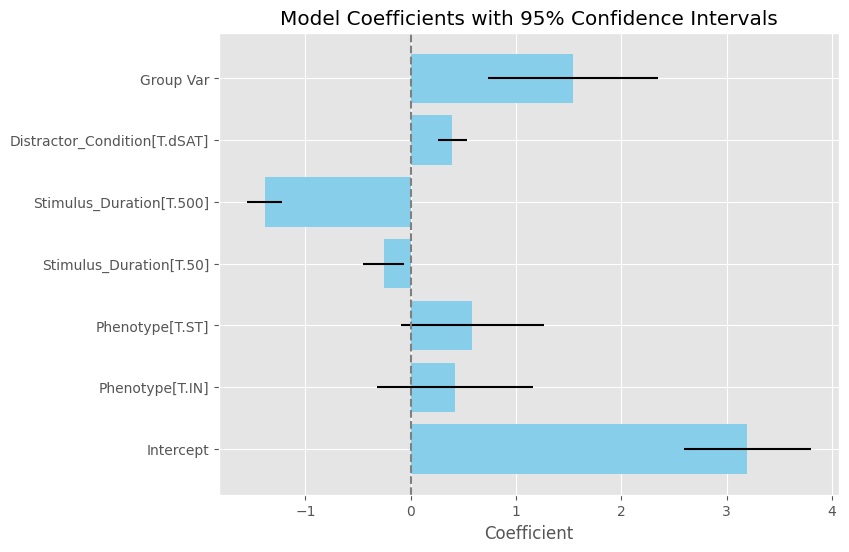

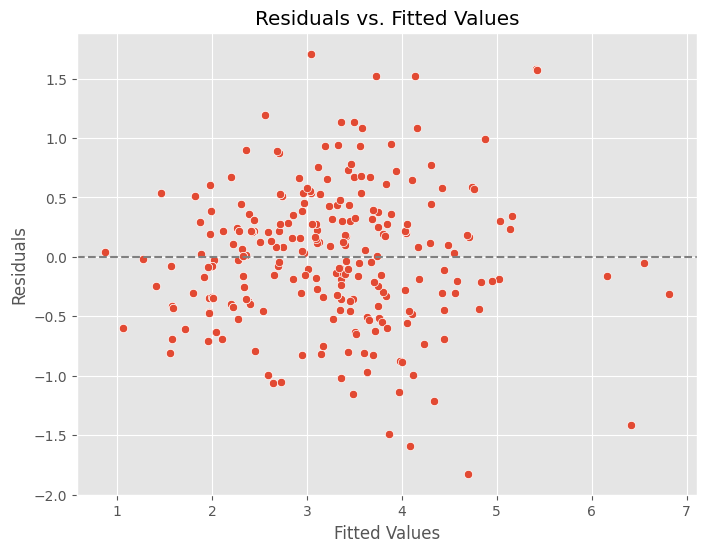

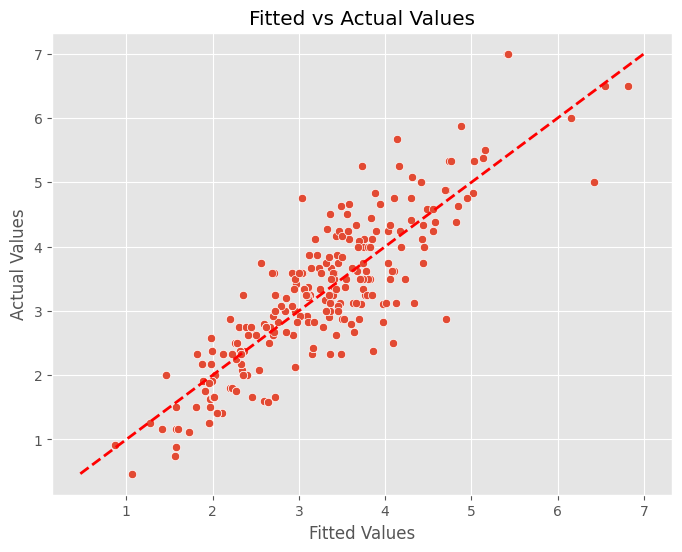

C:\Users\pfh3221\AppData\Local\Temp\ipykernel_17728\2630307633.py:50: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df, x='Stimulus_Duration', y='MISSES', hue='Distractor_Condition', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

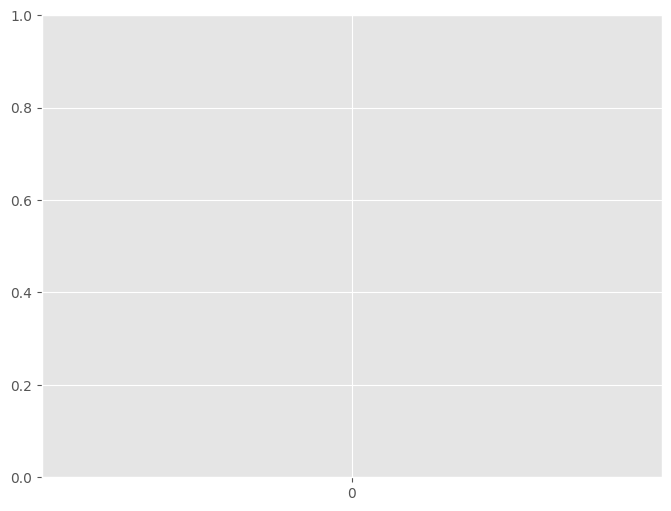

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the style
plt.style.use('ggplot')

# 1. Coefficient Plot
def plot_coefficients(result):
    params = result.params
    conf_int = result.conf_int()
    errors = conf_int[1] - params  # Calculate the error bar length
    
    plt.figure(figsize=(8, 6))
    plt.barh(params.index, params, xerr=errors, align='center', color='skyblue')
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.xlabel('Coefficient')
    plt.title('Model Coefficients with 95% Confidence Intervals')
    plt.show()

# 2. Residual Plot
def plot_residuals(result, df):
    residuals = result.resid
    fitted_values = result.fittedvalues
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=fitted_values, y=residuals)
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted Values')
    plt.show()

# 3. Fitted vs Actual Plot
def plot_fitted_vs_actual(result, df):
    fitted_values = result.fittedvalues
    actual_values = df['MISSES']
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=fitted_values, y=actual_values)
    plt.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], color='red', lw=2, linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Actual Values')
    plt.title('Fitted vs Actual Values')
    plt.show()

# 4. Interaction Plot (optional, for example between Stimulus_Duration and Distractor_Condition)
def plot_interaction(df):
    plt.figure(figsize=(8, 6))
    sns.pointplot(data=df, x='Stimulus_Duration', y='MISSES', hue='Distractor_Condition', dodge=True, markers=['o', 's'], capsize=.1, errwidth=1, palette='colorblind')
    plt.title('Interaction Plot: Stimulus Duration and Distractor Condition')
    plt.xlabel('Stimulus Duration')
    plt.ylabel('MISSES')
    plt.show()

# Plotting the visualizations
plot_coefficients(result_final)
plot_residuals(result_final, df_tidy)
plot_fitted_vs_actual(result_final, df_tidy)
plot_interaction(df_tidy)  # Interaction plot example


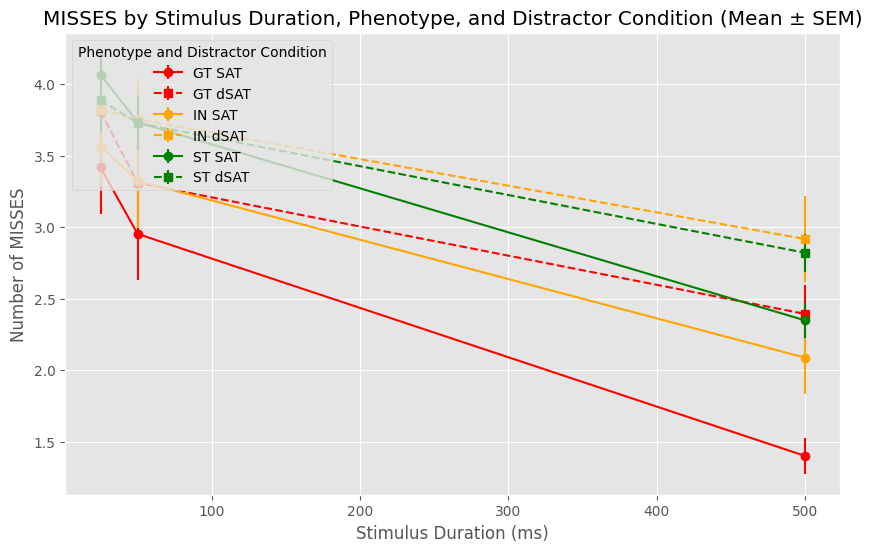

In [16]:
# Reload the 'Tidy' sheet with proper handling
df_tidy = pd.read_excel(xls, sheet_name='Tidy')

# Ensure 'Stimulus_Duration' is categorical and formatted correctly
df_tidy['Stimulus_Duration'] = pd.Categorical(df_tidy['Stimulus_Duration'], categories=[25, 50, 500], ordered=True)

# Ensure 'MISSES' is numeric
df_tidy['MISSES'] = pd.to_numeric(df_tidy['MISSES'], errors='coerce')

# Proceed with the same steps as before to group data and plot it
df_grouped = df_tidy.groupby(['Stimulus_Duration', 'Phenotype', 'Distractor_Condition']).agg(
    mean_MISSES=('MISSES', 'mean'),
    std_MISSES=('MISSES', 'std'),
    n=('MISSES', 'count')
).reset_index()

# Calculate standard error of the mean (SEM)
df_grouped['sem_MISSES'] = df_grouped['std_MISSES'] / np.sqrt(df_grouped['n'])

# Plot the data to check if the problem is resolved
plt.figure(figsize=(10, 6))

for phenotype in df_grouped['Phenotype'].unique():
    subset = df_grouped[df_grouped['Phenotype'] == phenotype]
    
    if phenotype in phenotype_colors:
        plt.errorbar(subset[subset['Distractor_Condition'] == 'SAT']['Stimulus_Duration'].to_numpy(), 
                     subset[subset['Distractor_Condition'] == 'SAT']['mean_MISSES'].to_numpy(), 
                     yerr=subset[subset['Distractor_Condition'] == 'SAT']['sem_MISSES'].to_numpy(), 
                     label=f'{phenotype} SAT', color=phenotype_colors[phenotype], marker='o', linestyle='-')
        
        plt.errorbar(subset[subset['Distractor_Condition'] == 'dSAT']['Stimulus_Duration'].to_numpy(), 
                     subset[subset['Distractor_Condition'] == 'dSAT']['mean_MISSES'].to_numpy(), 
                     yerr=subset[subset['Distractor_Condition'] == 'dSAT']['sem_MISSES'].to_numpy(), 
                     label=f'{phenotype} dSAT', color=phenotype_colors[phenotype], marker='s', linestyle='--')

plt.title("MISSES by Stimulus Duration, Phenotype, and Distractor Condition (Mean ± SEM)")
plt.xlabel("Stimulus Duration (ms)")
plt.ylabel("Number of MISSES")
plt.legend(title="Phenotype and Distractor Condition", loc="upper left")
plt.grid(True)
plt.show()



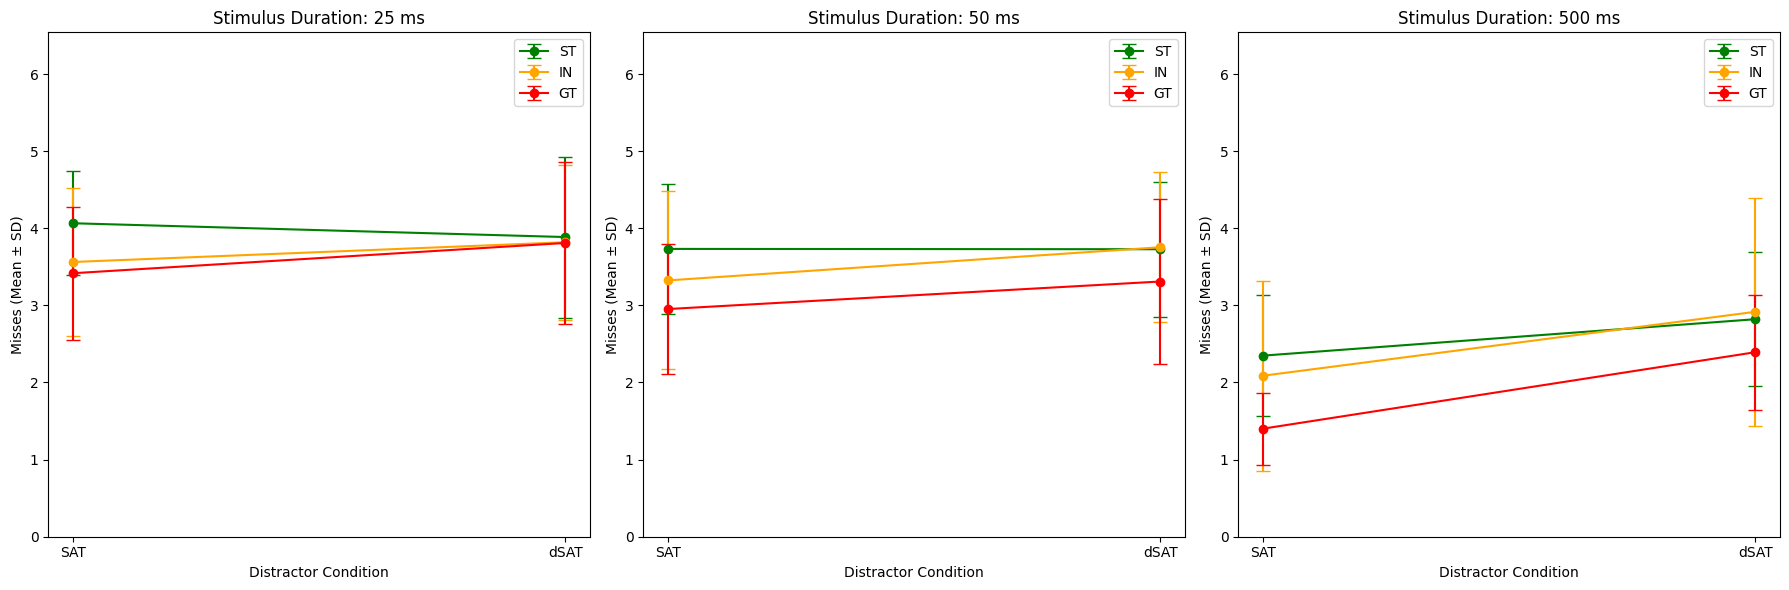

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'DATA dSAT2.xlsx'

# Load the data from the 'Tidy' sheet
tidy_data = pd.read_excel(file_path, sheet_name='Tidy')

# Filter out the relevant columns and data for plotting
filtered_data = tidy_data[['Stimulus_Duration', 'Distractor_Condition', 'Phenotype', 'MISSES']]

# Calculate the mean and standard deviation of 'MISSES' for each combination of Stimulus_Duration, Distractor_Condition, and Phenotype
summary_misses = filtered_data.groupby(['Stimulus_Duration', 'Distractor_Condition', 'Phenotype']).agg(
    mean_misses=('MISSES', 'mean'),
    std_misses=('MISSES', 'std')
).reset_index()

# Define the unique stimulus durations
stimulus_durations = summary_misses['Stimulus_Duration'].unique()

# Define the phenotype colors
phenotypes = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Set up the plot configuration for side-by-side graphs for 'MISSES'
plt.figure(figsize=(18, 6))

# Create the plots for each stimulus duration with mean and standard deviation for 'MISSES', side by side
for i, duration in enumerate(stimulus_durations, start=1):
    plt.subplot(1, 3, i)
    
    for phenotype, color in phenotypes.items():
        subset = summary_misses[(summary_misses['Stimulus_Duration'] == duration) & (summary_misses['Phenotype'] == phenotype)]
        plt.errorbar(subset['Distractor_Condition'], subset['mean_misses'], yerr=subset['std_misses'], 
                     label=phenotype, color=color, marker='o', capsize=5)
    
    plt.title(f'Stimulus Duration: {duration} ms')
    plt.xlabel('Distractor Condition')
    plt.ylabel('Misses (Mean ± SD)')
    plt.ylim(0, summary_misses['mean_misses'].max() + summary_misses['std_misses'].max() + 1)
    plt.legend()

plt.tight_layout()
plt.show()


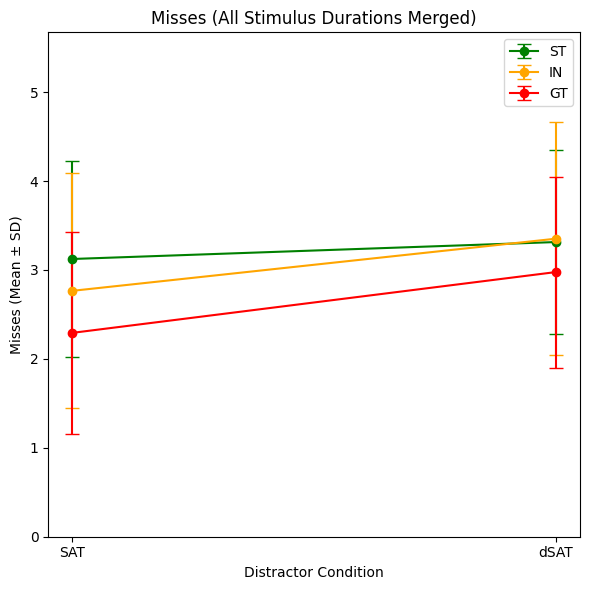

In [4]:
# Calculate the mean and standard deviation of 'MISSES' for each combination of Distractor_Condition and Phenotype
# Merging all stimulus durations
summary_misses_merged = tidy_data.groupby(['Distractor_Condition', 'Phenotype']).agg(
    mean_misses=('MISSES', 'mean'),
    std_misses=('MISSES', 'std')
).reset_index()

# Set up the plot configuration for the merged stimulus durations
plt.figure(figsize=(6, 6))

# Create the plot for the merged stimulus durations with mean and standard deviation for 'MISSES'
for phenotype, color in phenotypes.items():
    subset = summary_misses_merged[summary_misses_merged['Phenotype'] == phenotype]
    plt.errorbar(subset['Distractor_Condition'], subset['mean_misses'], yerr=subset['std_misses'], 
                 label=phenotype, color=color, marker='o', capsize=5)

plt.title('Misses (All Stimulus Durations Merged)')
plt.xlabel('Distractor Condition')
plt.ylabel('Misses (Mean ± SD)')
plt.ylim(0, summary_misses_merged['mean_misses'].max() + summary_misses_merged['std_misses'].max() + 1)
plt.legend()

plt.tight_layout()
plt.show()
